# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Ibrahim Olayiwola

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [2]:
import to_import as ti
import plots as pt

In [3]:
# load data
fp = "salary.csv"  # file path
data = ti.load_data(filename=fp)

data.head()

Shape of data: (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Exploratory Data Analysis


In [4]:
# Check datatypes
data.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [5]:
# Check missing data
data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

From the above, it can be seen that there are no missing data from the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Summary statistics of age
data["Age"].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

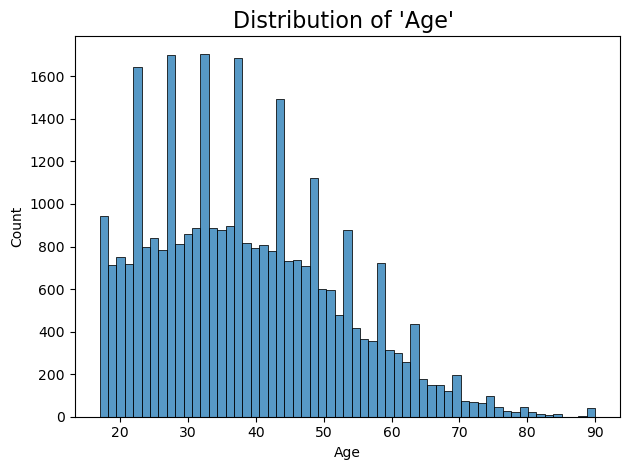

In [8]:
#  Distribution of age
pt.plot_histogram(data=data, feature="Age")

In [9]:
# The work class column
data["Workclass"].describe()

count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [10]:
data["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
# Get details of where work class = '?'
data[data["Workclass"] == " ?"].count()

Age               1836
Workclass         1836
Final_weight      1836
Education         1836
Education_num     1836
Marital_status    1836
Occupation        1836
Relationship      1836
Race              1836
Sex               1836
Capital_gain      1836
Capital_loss      1836
Hours_per_week    1836
Country           1836
Salary            1836
dtype: int64

There are 1836 empty rows in the workclass column, and it will be filled with the most occuring work class which is "Private".

In [12]:
# Fraction of dataset that has empty workclass column
1836 / 32560

0.05638820638820639

In [13]:
# Final Weight Column
data["Final_weight"].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: Final_weight, dtype: float64

In [14]:
data["Final_weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32560 entries, 0 to 32559
Series name: Final_weight
Non-Null Count  Dtype
--------------  -----
32560 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


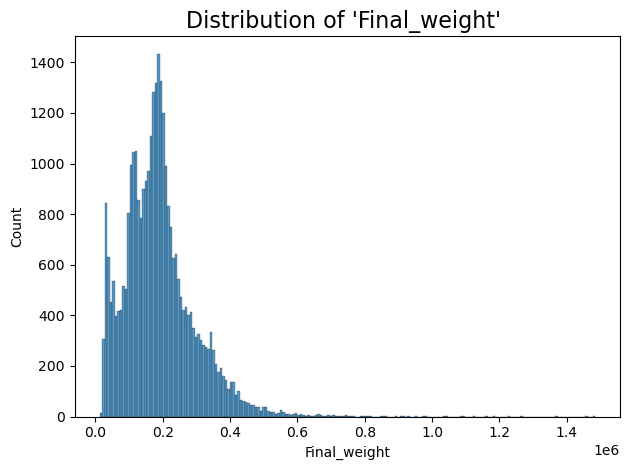

In [15]:
pt.plot_histogram(data=data, feature="Final_weight")

I have no idea what final weight means.

In [16]:
# Education Column
data["Education"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32560 entries, 0 to 32559
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
32560 non-null  object
dtypes: object(1)
memory usage: 254.5+ KB


In [17]:
# Checking the unique values of the Education column
data["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In the education column, the grades, are from pre-school to prof-school. The orders needs to be known.

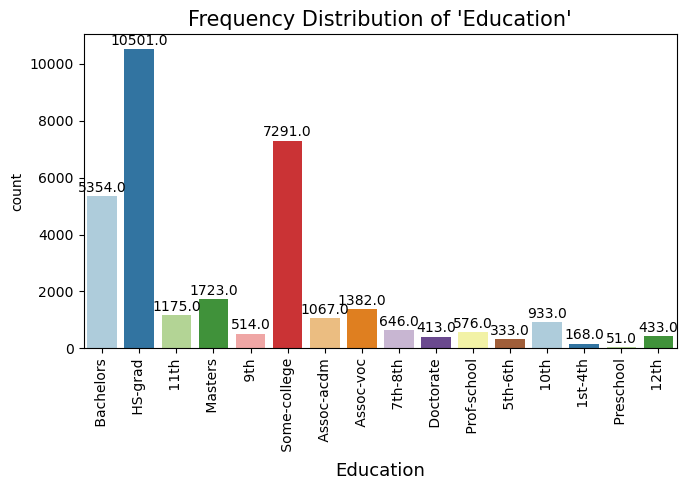

In [18]:
pt.display_count(data=data, feature="Education")

In [19]:
# Education Number column
data["Education_num"].describe()

count    32560.000000
mean        10.080590
std          2.572709
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_num, dtype: float64

In [20]:
data["Education_num"].nunique()

16

More information is needed about the 'Education_num' column.

In [21]:
# Marital status Column
data["Marital_status"].nunique()

7

In [22]:
data["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [23]:
data["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [24]:
# Occupation
data["Occupation"].describe()

count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: Occupation, dtype: object

In [25]:
data["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
data[data["Occupation"] == " ?"].count()

Age               1843
Workclass         1843
Final_weight      1843
Education         1843
Education_num     1843
Marital_status    1843
Occupation        1843
Relationship      1843
Race              1843
Sex               1843
Capital_gain      1843
Capital_loss      1843
Hours_per_week    1843
Country           1843
Salary            1843
dtype: int64

In [27]:
data.shape

(32560, 15)

In [28]:
# Getting the percentages of empty data in the columns
1843 / 32560

0.0566031941031941

There are empty cells in the occupation column, and it is 5.7 percent of the data.

In [29]:
# Relationship Column
data["Relationship"].describe()

count        32560
unique           6
top        Husband
freq         13193
Name: Relationship, dtype: object

In [30]:
data["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

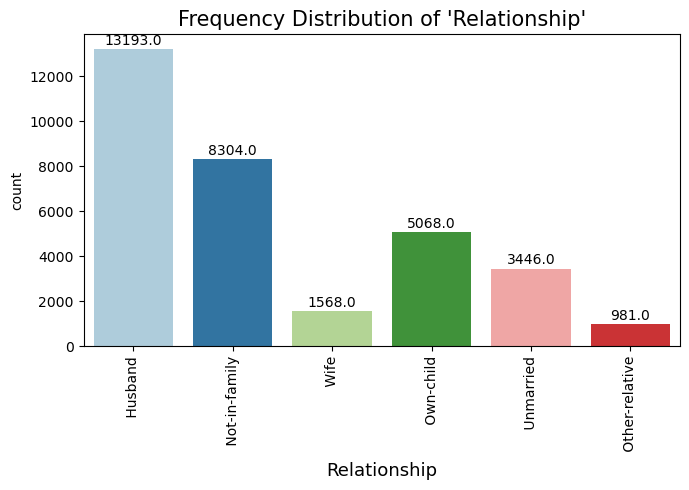

In [31]:
pt.display_count(data=data, feature="Relationship")

In [32]:
# Race Column
data["Race"].describe()

count      32560
unique         5
top        White
freq       27815
Name: Race, dtype: object

In [33]:
data["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

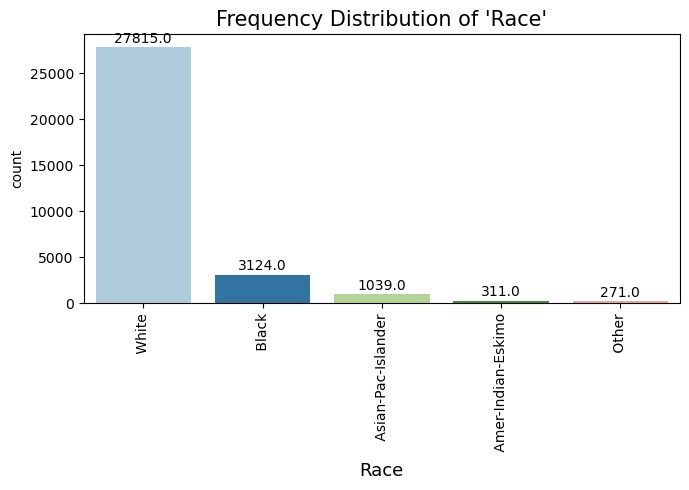

In [34]:
pt.display_count(data=data, feature="Race")

In [35]:
# Sex Column
data["Sex"].describe()

count     32560
unique        2
top        Male
freq      21789
Name: Sex, dtype: object

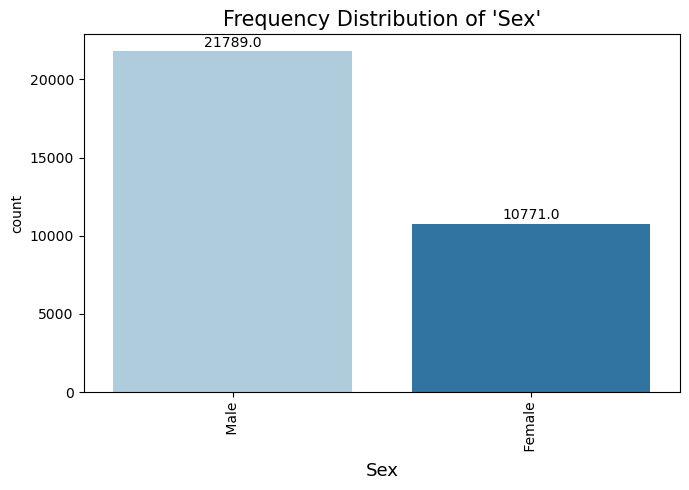

In [36]:
# Viewing the column via a bar chart
pt.display_count(data=data, feature="Sex")

In [37]:
# Capital gain
data["Capital_gain"].describe()

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

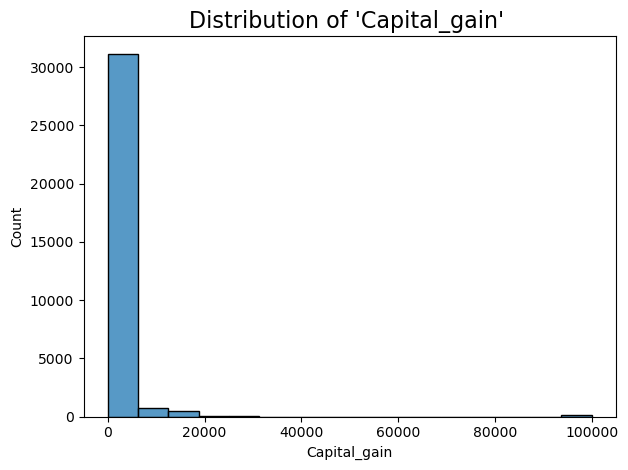

In [38]:
pt.plot_histogram(data=data, feature="Capital_gain")

It seems most values are zero, and one value is 99,999. This column will be removed.

In [39]:
# Capital_loss
data["Capital_loss"].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_loss, dtype: float64

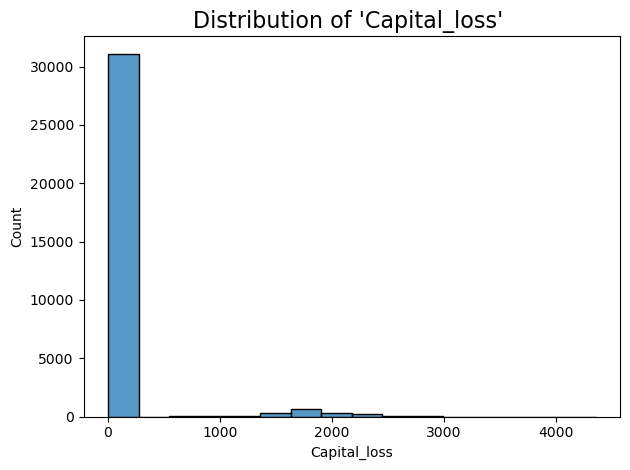

In [40]:
pt.plot_histogram(data=data, feature="Capital_loss")

This column will also be removed as over 75% of the data is zero.

In [41]:
# Hours per week
data["Hours_per_week"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32560 entries, 0 to 32559
Series name: Hours_per_week
Non-Null Count  Dtype
--------------  -----
32560 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


In [42]:
data["Hours_per_week"].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

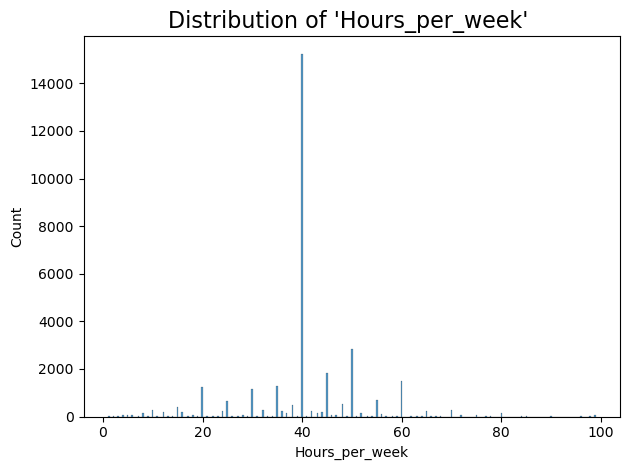

In [43]:
pt.plot_histogram(data=data, feature="Hours_per_week")

The data seems okay.

In [44]:
# Country
data["Country"].describe()

count              32560
unique                42
top        United-States
freq               29169
Name: Country, dtype: object

In [45]:
data["Country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [46]:
data[data["Country"] == " ?"].count()

Age               583
Workclass         583
Final_weight      583
Education         583
Education_num     583
Marital_status    583
Occupation        583
Relationship      583
Race              583
Sex               583
Capital_gain      583
Capital_loss      583
Hours_per_week    583
Country           583
Salary            583
dtype: int64

In [47]:
# What fraction of the data has no country
583 / 32560

0.017905405405405406

Only 1.7 percent of the data has countries that are empty. These rows may be changed to the highest number or the lowest occuring countries.

In [48]:
# Salary
data["Salary"].describe()

count      32560
unique         2
top        <=50K
freq       24719
Name: Salary, dtype: object

In [49]:
data["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

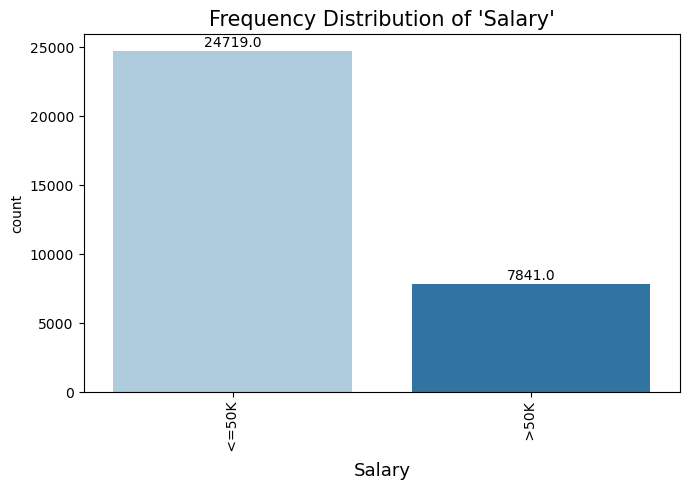

In [50]:
pt.display_count(data=data, feature="Salary")

### Cleaning and Bivariate Analysis.
Some aspect of the data will be cleaned, and columns will be compared to the salary column.

In [51]:
# Copy the data to preserve the dataset
df = data.copy()
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [52]:
df.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Salary'],
      dtype='object')

In [53]:
# Change column names to lower case
df.columns = [x.lower() for x in data.columns]

# Check
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [54]:
# Removing the final weight, both capital columns, relationship and education number
df.drop(
    ["final_weight", "capital_gain", "capital_loss", "education_num", "relationship"],
    axis=1,
    inplace=True,
)

# Confirm
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation', 'race',
       'sex', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   marital_status  32560 non-null  object
 4   occupation      32560 non-null  object
 5   race            32560 non-null  object
 6   sex             32560 non-null  object
 7   hours_per_week  32560 non-null  int64 
 8   country         32560 non-null  object
 9   salary          32560 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [56]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [57]:
# Get the most common value in workclass
df["workclass"].describe()

count        32560
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

In [58]:
df["workclass"].replace(" ?", " Private", inplace=True)
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [59]:
# Replace " ?" in the occupation column with the most common.
df["occupation"].describe()

count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [60]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [61]:
df["occupation"].replace(" ?", " Prof-specialty", inplace=True)
df["occupation"].describe()

count               32560
unique                 14
top        Prof-specialty
freq                 5983
Name: occupation, dtype: object

#### Bivariate Analysis
In this section, the salary column will be plotted against other columns

In [62]:
# Age column
df["age"].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

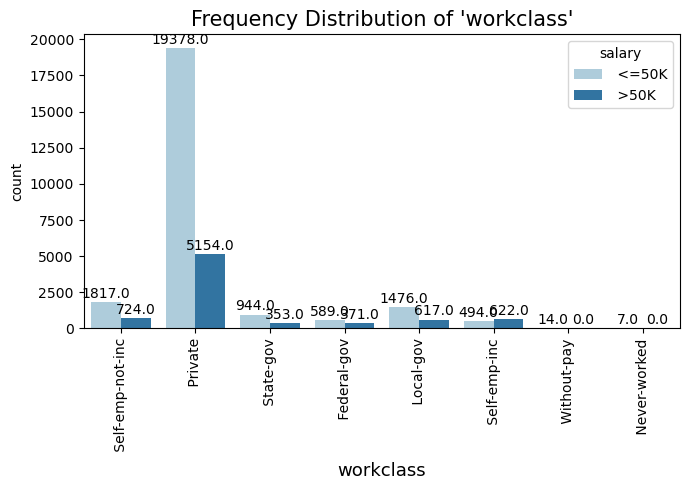

In [63]:
# Workclass column with salary
pt.display_count(data=df, feature="workclass", hue="salary")

From the above
- The government employees will be grouped into civil servants
- self employed will be grouped into enterpreneurs
- without pay and never worked will be removed.

In [64]:
# drop without pay and never-worked
df = df.drop(df[df["workclass"] == " Without-pay"].index)
df = df.drop(df[df["workclass"] == " Never-worked"].index)

df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc'], dtype=object)

In [65]:
# Moving all self employed to one value
df["workclass"].replace(
    [" Self-emp-not-inc", " Self-emp-inc"],
    "Self employed",
    inplace=True,
)

# Moving all government staff to one value
df["workclass"].replace(
    [" State-gov", " Federal-gov", " Local-gov"],
    "Civil servant",
    inplace=True,
)

# Checking
df["workclass"].unique()

array(['Self employed', ' Private', 'Civil servant'], dtype=object)

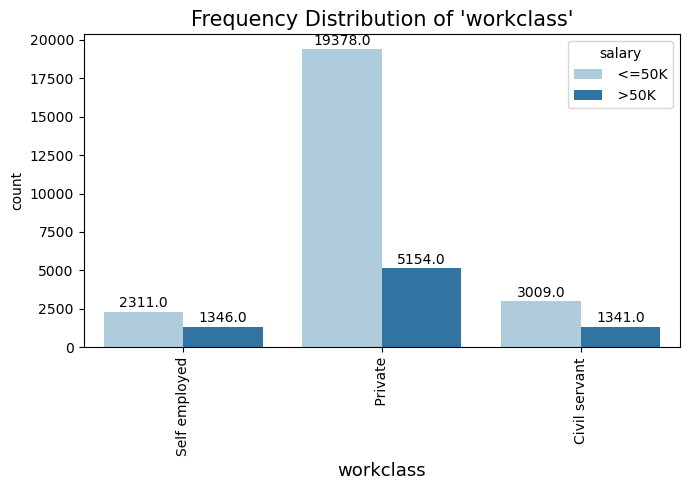

In [66]:
# Plotting the distribution of workclass
pt.display_count(data=df, feature="workclass", hue="salary")

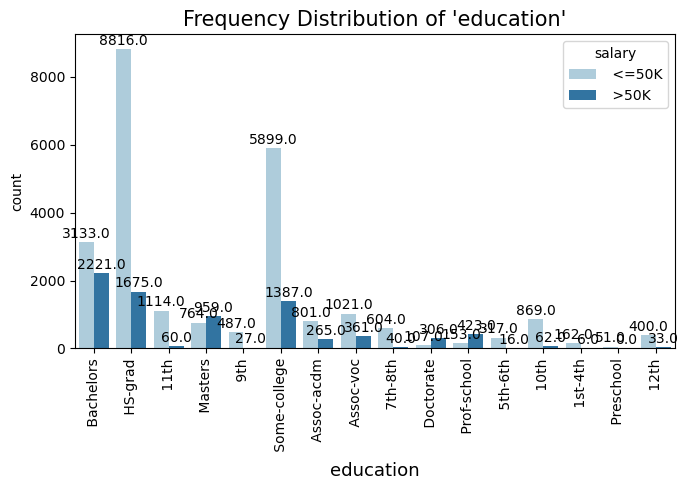

In [67]:
# education with salary
pt.display_count(data=df, feature="education", hue="salary")

In [68]:
# Grouping all grades from 1st to 12 to Pre_HS_grad
df["education"].replace(
    [
        " 11th",
        " 9th",
        " 7th-8th",
        " 5th-6th",
        " 10th",
        " 1st-4th",
        " Preschool",
        " 12th",
    ],
    " Pre_HS_grad",
    inplace=True,
)

# Check
df["education"].unique()

array([' Bachelors', ' HS-grad', ' Pre_HS_grad', ' Masters',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school'], dtype=object)

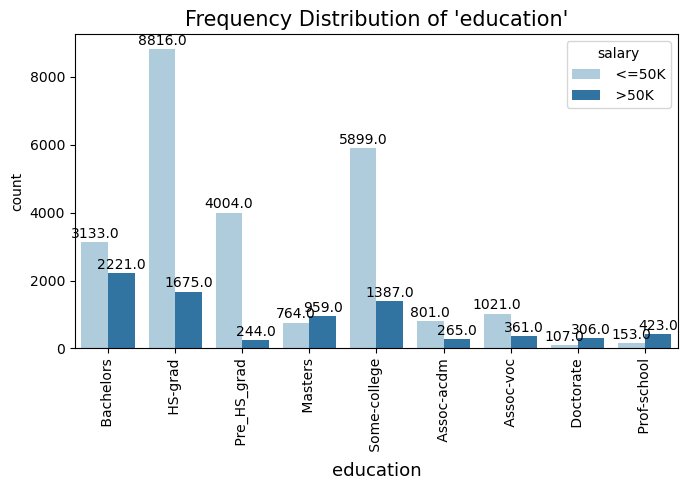

In [69]:
# plot education with salary
pt.display_count(data=df, feature="education", hue="salary")

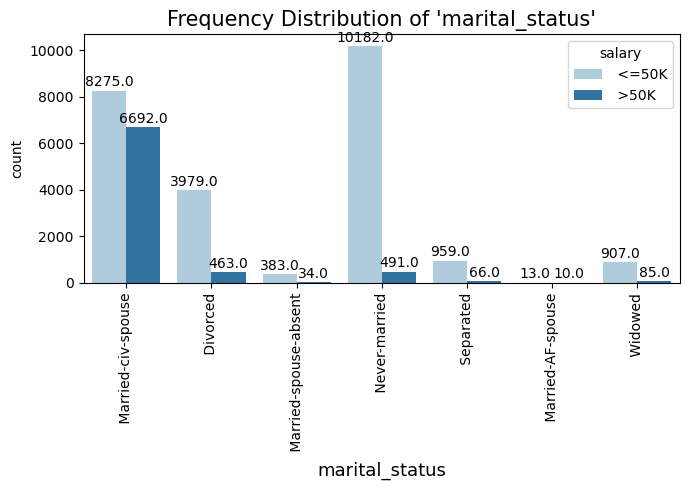

In [70]:
# marital status
pt.display_count(data=df, feature="marital_status", hue="salary")

In [71]:
df.marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [72]:
# Trimming the marital status column
# Moving all married to one value
df["marital_status"].replace(
    [" Married-civ-spouse", " Married-AF-spouse"],
    "Married",
    inplace=True,
)

# Moving all married but separated or widowed to one value
df["marital_status"].replace(
    [" Divorced", " Married-spouse-absent", " Separated", " Widowed"],
    "Married_now_single",
    inplace=True,
)

# Changing never married to single
df["marital_status"].replace(" Never-married", "Single", inplace=True)

# Check
df["marital_status"].unique()

array(['Married', 'Married_now_single', 'Single'], dtype=object)

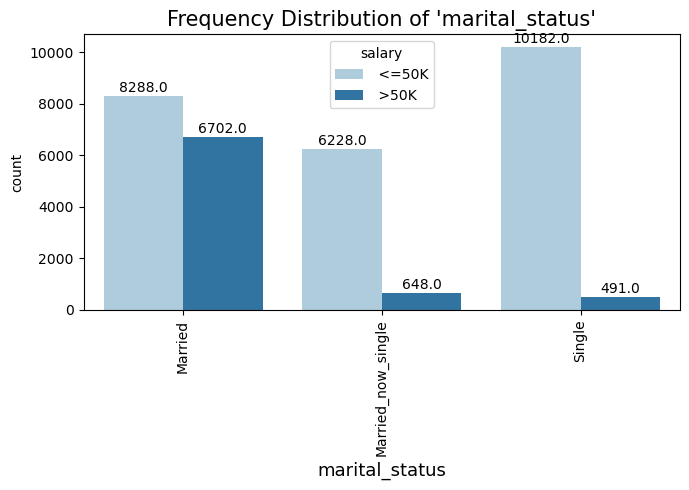

In [73]:
pt.display_count(data=df, feature="marital_status", hue="salary")

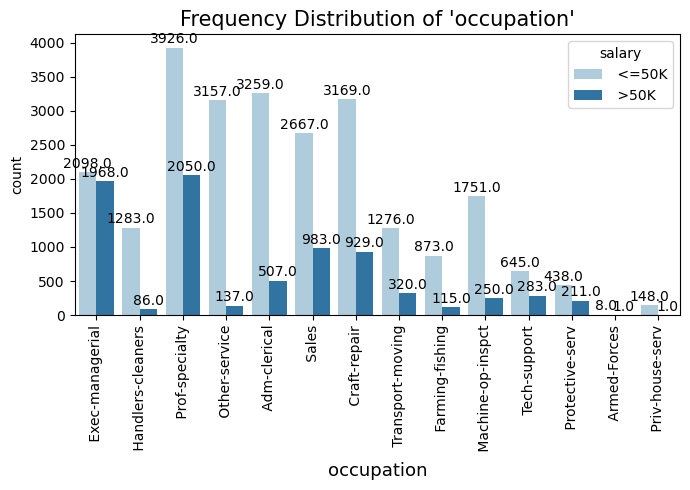

In [74]:
# Occupation
pt.display_count(data=df, feature="occupation", hue="salary")

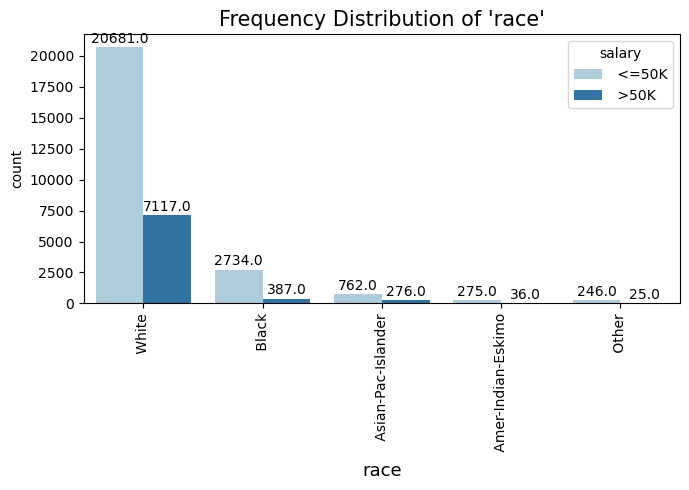

In [75]:
# Race
pt.display_count(data=df, feature="race", hue="salary")

In [76]:
# Replacing all races except white with other
df["race"].replace(
    [" Black", " Asian-Pac-Islander", " Amer-Indian-Eskimo"],
    " Other",
    inplace=True,
)

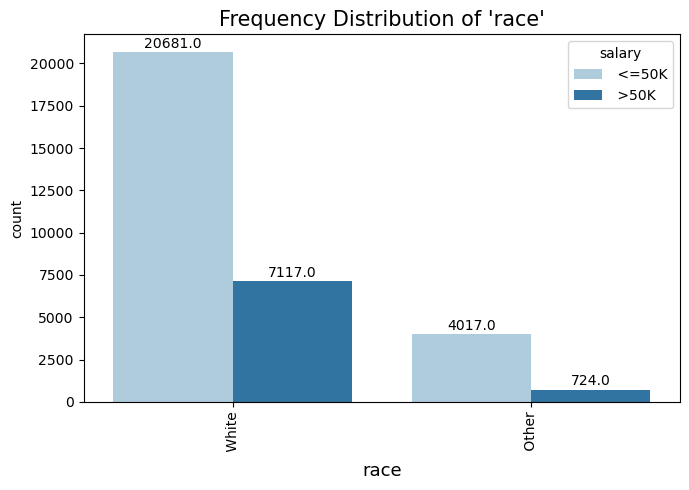

In [77]:
pt.display_count(data=df, feature="race", hue="salary")

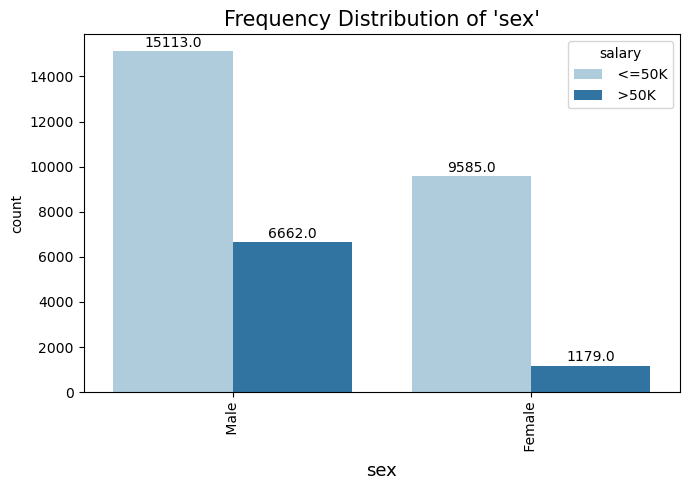

In [78]:
# sex
pt.display_count(data=df, feature="sex", hue="salary")

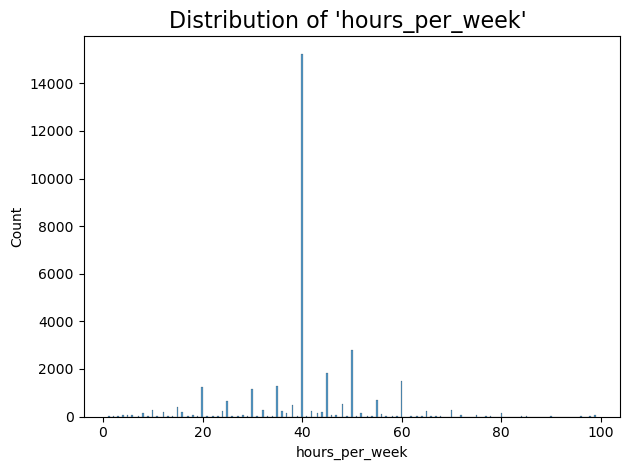

In [79]:
# Hours per week
# Plot
pt.plot_histogram(data=df, feature="hours_per_week")

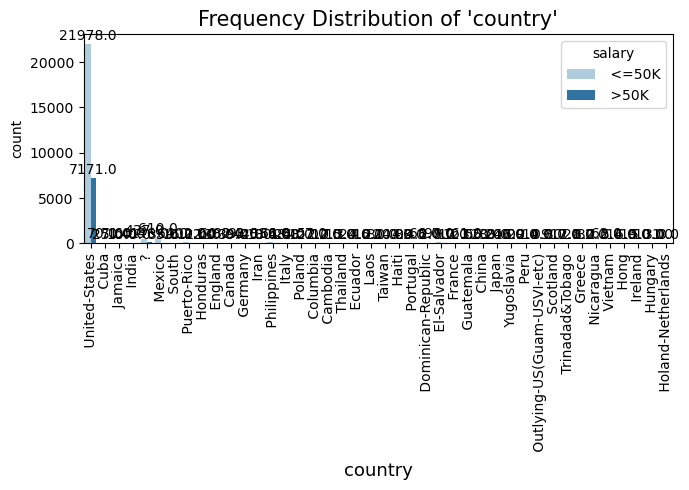

In [80]:
# Country
pt.display_count(data=df, feature="country", hue="salary")

In [81]:
# Replacing all countries except United States with other
df["country"].replace(
    [
        " Cuba",
        " Jamaica",
        " India",
        " ?",
        " Mexico",
        " South",
        " Puerto-Rico",
        " Honduras",
        " England",
        " Canada",
        " Germany",
        " Iran",
        " Philippines",
        " Italy",
        " Poland",
        " Columbia",
        " Cambodia",
        " Thailand",
        " Ecuador",
        " Laos",
        " Taiwan",
        " Haiti",
        " Portugal",
        " Dominican-Republic",
        " El-Salvador",
        " France",
        " Guatemala",
        " China",
        " Japan",
        " Yugoslavia",
        " Peru",
        " Outlying-US(Guam-USVI-etc)",
        " Scotland",
        " Trinadad&Tobago",
        " Greece",
        " Nicaragua",
        " Vietnam",
        " Hong",
        " Ireland",
        " Hungary",
        " Holand-Netherlands",
    ],
    " Other",
    inplace=True,
)

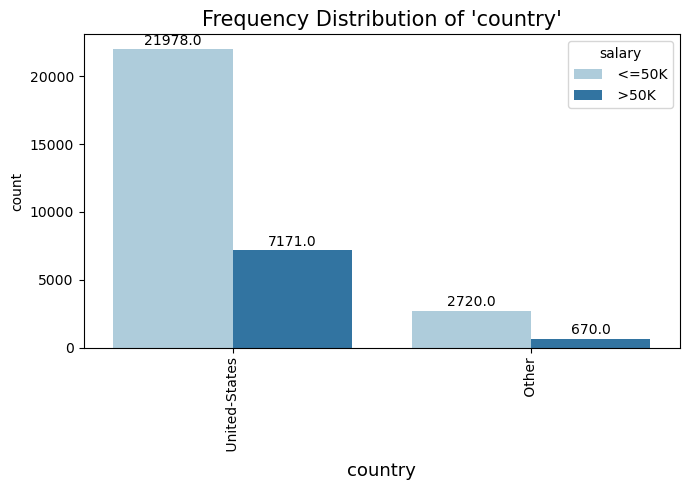

In [82]:
pt.display_count(data=df, feature="country", hue="salary")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32539 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32539 non-null  int64 
 1   workclass       32539 non-null  object
 2   education       32539 non-null  object
 3   marital_status  32539 non-null  object
 4   occupation      32539 non-null  object
 5   race            32539 non-null  object
 6   sex             32539 non-null  object
 7   hours_per_week  32539 non-null  int64 
 8   country         32539 non-null  object
 9   salary          32539 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


### Supervised Machine Learning

In [84]:
df["salary"].value_counts(normalize=True)

 <=50K    0.759028
 >50K     0.240972
Name: salary, dtype: float64

#### Initialize the Constants

In [85]:
RANDOM_STATE = 123
TEST_SIZE = 0.25  # 25 percent of the data will be used for testing our model
TARGET = "salary"

#### Split the data into train and test

In [86]:
from sklearn.model_selection import train_test_split

# Independent features (Matrix)
X = df.drop(columns=TARGET)

# Target variable (Vector)
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((24404, 9), (8135, 9))

In [87]:
X_train.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,country
6889,39,Private,Prof-school,Married,Prof-specialty,White,Male,45,United-States
24988,40,Private,Assoc-acdm,Married,Exec-managerial,White,Male,55,United-States
27834,32,Private,HS-grad,Single,Craft-repair,White,Male,50,United-States
5611,53,Civil servant,Doctorate,Married,Adm-clerical,White,Male,50,United-States
17800,38,Private,Assoc-voc,Married,Machine-op-inspct,White,Male,40,United-States


#### Feature Engineering

* Encode the categorical variables.
* Transform the numeric variables.

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler


vars_to_scale = ["age", "hours_per_week"]
vars_to_enc = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "race",
    "sex",
    "country",
]

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ===== Scaler =====
scaler = StandardScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['workclass', 'education', 'marital_status',
                                  'occupation', 'race', 'sex', 'country']),
                                ('scaler', StandardScaler(),
                                 ['age', 'hours_per_week'])])

In [89]:
ohe_2 = OneHotEncoder(dtype=int, handle_unknown="ignore")
transf = ohe_2.fit_transform(X_train).toarray()

df_2 = pd.DataFrame(data=transf, columns=ohe_2.get_feature_names_out())
df_2.shape

(24404, 197)

In [90]:
df_2.head()

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,age_75,age_76,age_77,age_78,age_79,age_80,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_90,workclass_ Private,workclass_Civil servant,workclass_Self employed,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Pre_HS_grad,education_ Prof-school,education_ Some-college,marital_status_Married,marital_status_Married_now_single,marital_status_Single,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Other,race_ White,sex_ Female,sex_ Male,hours_per_week_1,hours_per_week_2,hours_per_week_3,hours_per_week_4,hours_per_week_5,hours_per_week_6,hours_per_week_7,hours_per_week_8,hours_per_week_9,hours_per_week_10,hours_per_week_11,hours_per_week_12,hours_per_week_13,hours_per_week_14,hours_per_week_15,hours_per_week_16,hours_per_week_17,hours_per_week_18,hours_per_week_19,hours_per_week_20,hours_per_week_21,hours_per_week_22,hours_per_week_23,hours_per_week_24,hours_per_week_25,hours_per_week_26,hours_per_week_27,hours_per_week_28,hours_per_week_29,hours_per_week_30,hours_per_week_31,hours_per_week_32,hours_per_week_33,hours_per_week_34,hours_per_week_35,hours_per_week_36,hours_per_week_37,hours_per_week_38,hours_per_week_39,hours_per_week_40,hours_per_week_41,hours_per_week_42,hours_per_week_43,hours_per_week_44,hours_per_week_45,hours_per_week_46,hours_per_week_47,hours_per_week_48,hours_per_week_49,hours_per_week_50,hours_per_week_51,hours_per_week_52,hours_per_week_53,hours_per_week_54,hours_per_week_55,hours_per_week_56,hours_per_week_57,hours_per_week_58,hours_per_week_59,hours_per_week_60,hours_per_week_61,hours_per_week_62,hours_per_week_63,hours_per_week_64,hours_per_week_65,hours_per_week_66,hours_per_week_67,hours_per_week_68,hours_per_week_70,hours_per_week_72,hours_per_week_75,hours_per_week_76,hours_per_week_77,hours_per_week_78,hours_per_week_80,hours_per_week_81,hours_per_week_82,hours_per_week_84,hours_per_week_85,hours_per_week_86,hours_per_week_88,hours_per_week_90,hours_per_week_91,hours_per_week_92,hours_per_week_94,hours_per_week_95,hours_per_week_96,hours_per_week_98,hours_per_week_99,country_ Other,country_ United-States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# model1 = linear_modelLogisticRegressionCV(max_iter = 4000)

# Init
logit = LogisticRegression()

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'race', 'sex',
                                                   'country']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'hours_per_week'])])),
                ('logit', LogisticRegression())])

In [92]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred_1 = pipe_logit.predict(X_test)

# Probability of Surviving
y_proba_1 = pipe_logit.predict_proba(X_test)[:, 1]

C:\Users\USER\anaconda3\envs\stutern_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
y_test.value_counts(normalize=True)

 <=50K    0.759557
 >50K     0.240443
Name: salary, dtype: float64

In [94]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_1)


print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      6179
        >50K       0.68      0.54      0.60      1956

    accuracy                           0.83      8135
   macro avg       0.77      0.73      0.75      8135
weighted avg       0.82      0.83      0.82      8135



In [95]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_1), ": is the accuracy score")

0.8280270436385987 : is the accuracy score


In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_1)

array([[5688,  491],
       [ 908, 1048]], dtype=int64)

From the above, the acuracy is 83%